In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
import pandas as pd
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import cv2
from keras.models import Sequential, load_model
from keras.utils import to_categorical
tf.__version__

'2.4.1'

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
df_train = pd.read_pickle("./train_data.pkl")
df_train.shape

(5216, 2)

In [4]:
df_valid = pd.read_pickle("./valid_data.pkl")
print('df_valid: ',df_valid.shape)
df_test = pd.read_pickle("./test_data.pkl")
print('df_test: ',df_test.shape)

df_valid:  (16, 2)
df_test:  (624, 2)


In [5]:
df_train.head()

,label,matrix
0,0,"[[61, 63, 69, 75, 86, 85, 92, 89, 93, 96, 93, ..."
1,1,"[[51, 53, 52, 52, 57, 55, 60, 61, 62, 62, 60, ..."
2,1,"[[19, 20, 22, 27, 28, 30, 36, 40, 42, 46, 50, ..."
3,0,"[[12, 12, 13, 13, 15, 14, 15, 16, 15, 12, 16, ..."
4,1,"[[3, 3, 3, 2, 4, 13, 23, 25, 32, 43, 66, 64, 7..."


In [6]:
[df_train.iloc[i,1].shape for i in range(df_train.shape[0])]

[(224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224, 3),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224, 3),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224, 3),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224, 3),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224, 3),
 (224, 224),
 (224, 224

In [7]:
df_train['shape'] = df_train['matrix'].apply(lambda x: len(x.shape))

In [8]:
df_train.head()

,label,matrix,shape
0,0,"[[61, 63, 69, 75, 86, 85, 92, 89, 93, 96, 93, ...",2
1,1,"[[51, 53, 52, 52, 57, 55, 60, 61, 62, 62, 60, ...",2
2,1,"[[19, 20, 22, 27, 28, 30, 36, 40, 42, 46, 50, ...",2
3,0,"[[12, 12, 13, 13, 15, 14, 15, 16, 15, 12, 16, ...",2
4,1,"[[3, 3, 3, 2, 4, 13, 23, 25, 32, 43, 66, 64, 7...",2


In [9]:
df_train['shape'].value_counts()

2    4933
3     283
Name: shape, dtype: int64

In [10]:
x = df_train[df_train['shape'] ==3].iloc[0,1]

In [11]:
x.T[0].T.shape

(224, 224)

In [12]:
df_train.loc[df_train['shape'] ==3, 'matrix'] = df_train['matrix'].apply(lambda x: x.T[0].T)

In [13]:
[df_train.iloc[i,1].shape for i in range(df_train.shape[0])]

[(224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),

In [14]:
X_train = df_train['matrix'].values
X_train.shape

(5216,)

In [15]:
X_train = np.array([X_train[i] for i in range(X_train.shape[0])])/255.
X_train.shape

(5216, 224, 224)

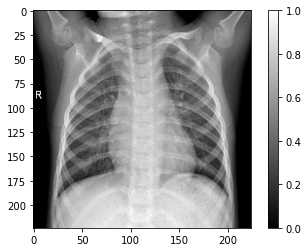

In [16]:
plt.figure()
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
[df_valid.iloc[i,1].shape for i in range(df_valid.shape[0])]

[(224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224)]

In [18]:
[df_test.iloc[i,1].shape for i in range(df_test.shape[0])]

[(224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),

In [19]:
X_valid = df_valid['matrix'].values
X_valid = np.array([X_valid[i] for i in range(X_valid.shape[0])])/255.
X_valid.shape

(16, 224, 224)

In [20]:
X_test = df_test['matrix'].values
X_test = np.array([X_test[i] for i in range(X_test.shape[0])])/255.
X_test.shape

(624, 224, 224)

In [21]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [22]:
X_train.shape

(5216, 224, 224, 1)

In [41]:
num_classes = 2

model_convolution = tf.keras.models.Sequential([
  layers.Conv2D(32, kernel_size=(3, 3), activation="relu",name='conv1',input_shape=X_train.shape[1:]),
  layers.MaxPooling2D(pool_size=(2, 2),name='pool1'),
  layers.Conv2D(64, kernel_size=(3, 3), activation="relu",name='conv2'),
  layers.MaxPooling2D(pool_size=(2, 2),name='pool2'),
  layers.Flatten(),
  layers.Dropout(0.1),
  tf.keras.layers.Dense(num_classes, activation="softmax")])

In [42]:
model_convolution.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 222, 222, 32)      320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2 (Conv2D)               (None, 109, 109, 64)      18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 186624)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                

In [43]:
y_train = df_train.label.values
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_train.shape

(5216, 2)

In [44]:
y_valid = df_valid.label.values
y_valid.shape

(16,)

In [45]:
y_test = df_test.label.values
y_test.shape

(624,)

In [46]:
batch_size = 16
epochs = 30
model_convolution.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
history = model_convolution.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
294/294 [==============================] - 29s 96ms/step - loss: 0.5217 - accuracy: 0.8171 - val_loss: 0.1129 - val_accuracy: 0.9540
Epoch 2/30
294/294 [==============================] - 42s 143ms/step - loss: 0.1004 - accuracy: 0.9635 - val_loss: 0.1351 - val_accuracy: 0.9387
Epoch 3/30
294/294 [==============================] - 40s 135ms/step - loss: 0.0641 - accuracy: 0.9770 - val_loss: 0.1059 - val_accuracy: 0.9559
Epoch 4/30
294/294 [==============================] - 40s 137ms/step - loss: 0.0465 - accuracy: 0.9827 - val_loss: 0.0960 - val_accuracy: 0.9598
Epoch 5/30
294/294 [==============================] - 39s 133ms/step - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.1205 - val_accuracy: 0.9617
Epoch 6/30
294/294 [==============================] - 39s 133ms/step - loss: 0.0164 - accuracy: 0.9950 - val_loss: 0.1229 - val_accuracy: 0.9655
Epoch 7/30
294/294 [==============================] - 40s 136ms/step - loss: 0.0179 - accuracy: 0.9928 - val_loss: 0.1086 - val_acc

In [48]:
model_convolution.save("model_convolution_drop_out_01")
np.save('model_convolution_drop_out_01_history.npy',history.history)

INFO:tensorflow:Assets written to: model_convolution_drop_out_01\assets


## model_convolution_drop_out_05

In [37]:
load_history=np.load('model_convolution_drop_out_05_history.npy',allow_pickle='TRUE').item()
reconstructed_model = load_model("model_convolution_drop_out_05")
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 222, 222, 32)      320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2 (Conv2D)               (None, 109, 109, 64)      18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0         
_________________________________________________________________
dropout (Dropout)            (None, 186624)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 3

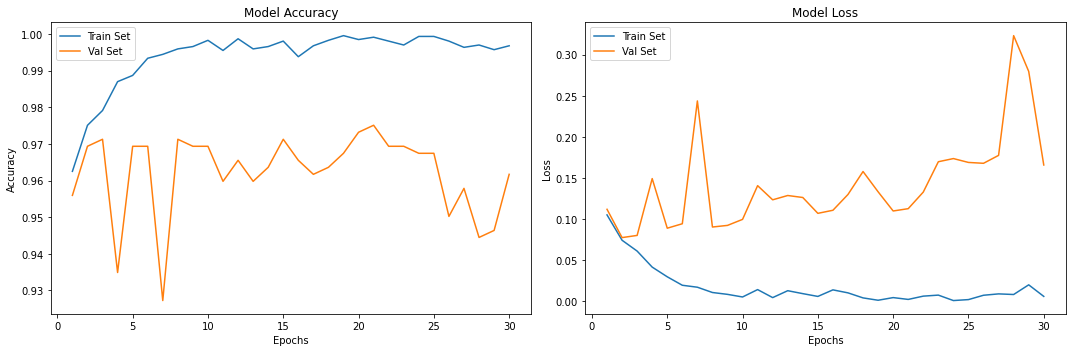

In [39]:
# plot model performance
acc = load_history['accuracy']
val_acc = load_history['val_accuracy']
loss = load_history['loss']
val_loss = load_history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [40]:
prob_predictions = reconstructed_model.predict(X_test)
predictions = [np.argmax(prob_predictions[i]) for i in range(X_test.shape[0])]

y_test = df_test.label.values

# validate on test set
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 96 138]
 [  2 388]]
              precision    recall  f1-score   support

           0       0.98      0.41      0.58       234
           1       0.74      0.99      0.85       390

    accuracy                           0.78       624
   macro avg       0.86      0.70      0.71       624
weighted avg       0.83      0.78      0.75       624



## model_convolution_drop_out_01

In [50]:
load_history=np.load('model_convolution_drop_out_01_history.npy',allow_pickle='TRUE').item()
reconstructed_model = load_model("model_convolution_drop_out_01")
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 222, 222, 32)      320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2 (Conv2D)               (None, 109, 109, 64)      18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 186624)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                

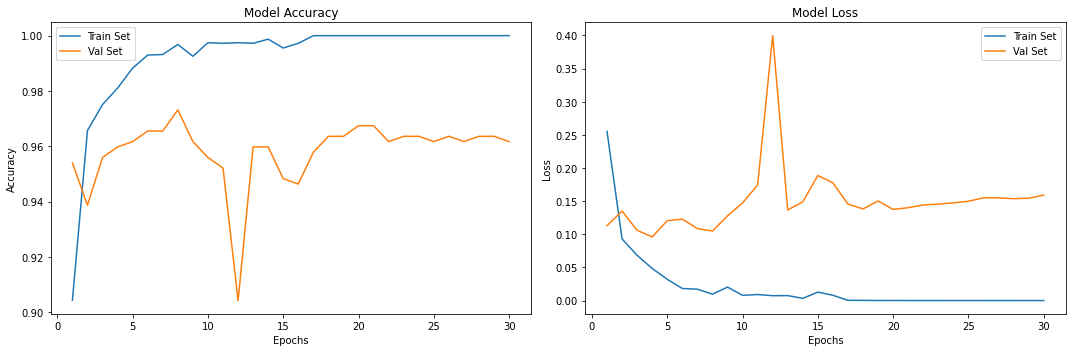

In [52]:
# plot model performance
acc = load_history['accuracy']
val_acc = load_history['val_accuracy']
loss = load_history['loss']
val_loss = load_history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [53]:
prob_predictions = reconstructed_model.predict(X_test)
predictions = [np.argmax(prob_predictions[i]) for i in range(X_test.shape[0])]

y_test = df_test.label.values

# validate on test set
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 69 165]
 [  2 388]]
              precision    recall  f1-score   support

           0       0.97      0.29      0.45       234
           1       0.70      0.99      0.82       390

    accuracy                           0.73       624
   macro avg       0.84      0.64      0.64       624
weighted avg       0.80      0.73      0.68       624

